<a href="https://colab.research.google.com/github/k9pranav/ML_learning_and_exp/blob/main/Dubai_property.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will be working with a Dataset that has data regarding property prices and property attributes of Dubai. 

I found the data set on Kaggle. Here is the link: https://www.kaggle.com/datasets/dataregress/dubai-properties-dataset

Like states in READ.ME, this notebook acts as a playground for me to deploy ML techniques and algos that I am learning. 

The reason I am putting it on Github is track and showcase my progress.

In [1]:
# Uploading the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd 
import io

df = pd.read_csv('/content/drive/MyDrive/Datasets/properties_data.csv')
df = df.set_index('id')
df

,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
id,,,,,,,,,,,,,,,,,,,,,
5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,False,...,False,False,True,False,False,False,False,False,True,False
6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,False,...,False,False,True,True,False,False,False,False,True,False
6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,True,...,False,True,True,True,False,False,False,True,True,True
6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,False,...,False,False,False,False,False,False,False,False,False,False
6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,False,...,False,True,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705450,Mohammed Bin Rashid City,25.176892,55.310712,1500000,1087,1379.94,2,2,Ultra,False,...,False,True,True,True,True,True,True,True,True,True
7706287,Mohammed Bin Rashid City,25.166145,55.276684,1230000,760,1618.42,1,2,Medium,False,...,False,False,True,True,False,False,False,False,True,True
7706389,Dubai Creek Harbour (The Lagoons),25.206500,55.345056,2900000,1930,1502.59,3,5,Medium,True,...,False,False,False,True,False,False,False,False,False,False


<function matplotlib.pyplot.show>

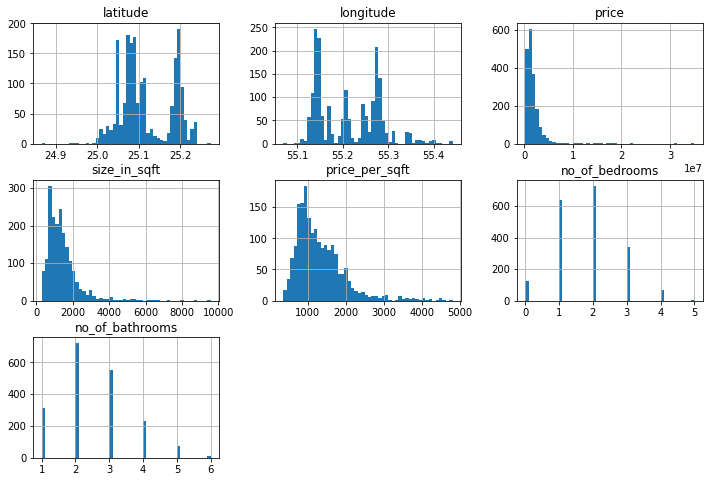

In [3]:
import matplotlib.pyplot as plt

df.hist(bins = 50, figsize = (12,8))
plt.show

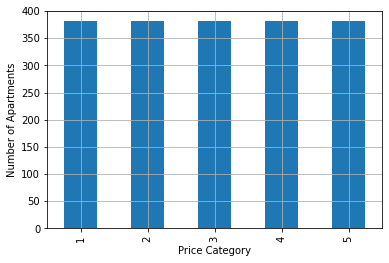

In [4]:
import numpy as np
df['size_cut'] = pd.qcut(df['size_in_sqft'], q = [0., 0.2, 0.4, 0.6, 0.8, 1.], labels = [1,2,3,4,5])

df['size_cut'].value_counts().sort_index().plot.bar(grid = True)
plt.xlabel('Price Category')
plt.ylabel('Number of Apartments')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(df, test_size = 0.2, stratify = df['size_cut'])

In [6]:
for i in (strat_train_set, strat_test_set):
  i.drop('size_cut', axis = 1, inplace=True)

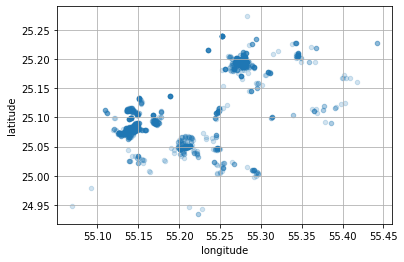

In [7]:
dubai = strat_train_set.copy()

dubai.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True, alpha = 0.2)
plt.show()

In [8]:
corr_matrix = dubai.corr()
corr_matrix['price'].sort_values()

pets_allowed          -0.115567
lobby_in_building     -0.101762
childrens_pool        -0.093949
security              -0.087528
childrens_play_area   -0.087337
vastu_compliant       -0.086070
networked             -0.083522
shared_pool           -0.075250
barbecue_area         -0.071514
shared_gym            -0.056513
study                 -0.023591
kitchen_appliances    -0.010837
longitude             -0.006150
walk_in_closet        -0.005361
shared_spa            -0.004661
maid_service          -0.004202
view_of_landmark       0.016337
balcony                0.016858
covered_parking        0.018489
central_ac             0.026277
unfurnished            0.036186
built_in_wardrobes     0.037309
private_garden         0.050384
view_of_water          0.080940
private_jacuzzi        0.084533
private_gym            0.086486
maid_room              0.100290
concierge              0.106688
latitude               0.213324
private_pool           0.301895
no_of_bathrooms        0.504051
no_of_be

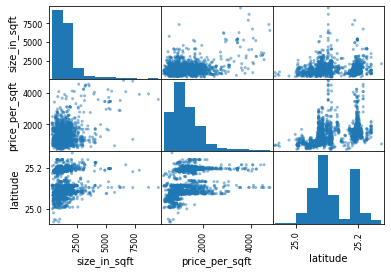

In [9]:
from pandas.plotting import scatter_matrix

attributes = ['private_pool', 'no_of_bathrooms', 'no_of_bedrooms', 'size_in_sqft']

scatter_matrix(dubai[['size_in_sqft', 'price_per_sqft', 'latitude']])
plt.show()

In [10]:
scale_mapper = {'Low':1, 'Medium':2, 'High': 3, 'Ultra': 4}

dubai['quality'] = df['quality'].replace(scale_mapper)



In [11]:
dubai_exp = dubai.copy()
from sklearn.metrics.pairwise import rbf_kernel

dubai_exp = rbf_kernel(dubai_exp[["latitude"]], [[25.075]], gamma=0.1)

dubai_exp



array([[0.99824504],
       [0.99988232],
       [0.99984576],
       ...,
       [0.9984167 ],
       [0.99998499],
       [0.99999995]])

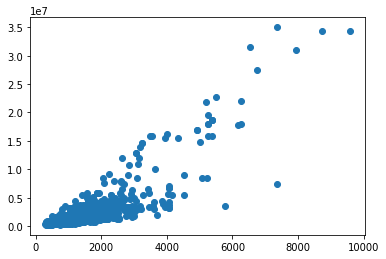

In [12]:
# Housing is dubai data, without the independent variable, price
# Housing label is just the price of column
housing = dubai.drop('price', axis = 1)
housing_label = dubai['price'].copy()

plt.scatter(housing['size_in_sqft'], housing_label)
plt.show()

In [13]:
# Feature Engineering: Standardization. Sometimes, the range of the values of the attributes 
# is too much/varied, which decreases the validity/accuracy of model/predictions
# so we scale the variables. Here I have used standardization to scale the values.
# Here, I have scaled both the dependent and independent variables

from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

some_new_data = dubai[['size_in_sqft']].iloc[:5]

model = TransformedTargetRegressor(LinearRegression(), 
                                   transformer = StandardScaler())

model.fit(housing[['size_in_sqft']], housing_label)
predictions = model.predict(some_new_data)

In [14]:
type(housing['size_in_sqft'])

pandas.core.series.Series

In [15]:
# Custom Transformers
# Sometimes, the transformation that are required while scaling may not be available. 
# So we have to create our own 
# Here, I have used Function Transformer

from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log)

log_size_sqft = log_transformer.transform(housing[['size_in_sqft']])

In [16]:

from sklearn.utils.validation import check_is_fitted
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
# Creating a custom transformer using class
# Here, I have tried to create a custom class for min-max scaling
# between the range -1 and 1

class MinMaxClone(BaseEstimator, TransformerMixin):

  def __init__(self):  
    pass

  def fit(self, X, y=None):
    self.min = X.min()
    self.max = X.max() 
    self.n_features_in_ = X.shape[1]
    return self 

  def transform(self, X):
    check_is_fitted(self)  # looks for learned attributes (with trailing _)
    X = check_array(X)
    assert self.n_features_in_ == X.shape[1]
    return (-1 + (2*(X - self.min))/(self.max - self.min))



In [17]:
housing_num = housing.select_dtypes(include=[np.number])

In [27]:


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),
    ('standardize', StandardScaler()),
])

from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler())

# As SimpleImputer Does not have get_feature_names_out method, I had to add it
# In this case, I used the get_feature_names_out from standardscaler
SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out

housing_num_prepared = num_pipeline.fit_transform(housing_num)



In [29]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

df_housing_num_prepared

,latitude,longitude,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality
id,,,,,,,
7544817,1.463688,0.960449,-0.315632,-0.341785,-0.828780,-0.490160,-1.202427
7673419,-0.115107,-0.942061,-0.303695,0.090095,-0.828780,-0.490160,1.571984
6356790,-0.035241,-1.058419,0.692454,4.075565,0.220274,0.455415,1.571984
6562472,1.294713,0.858858,-0.278737,-0.088050,0.220274,-0.490160,0.184779
7554713,-0.207623,-0.638546,2.734668,3.788240,1.269327,1.400989,0.184779
...,...,...,...,...,...,...,...
7530921,-0.075054,0.512939,0.172677,0.447512,1.269327,0.455415,0.184779
7672737,-0.840237,0.058726,-0.808281,-1.136756,-0.828780,-1.435735,0.184779
7617063,1.356738,0.936391,0.027269,0.719277,0.220274,0.455415,0.184779


In [25]:
k = SimpleImputer(strategy='median')

k.fit_transform(housing_num)

k.get_features_names_out()

AttributeError: ignored